# Download imagens do LandSata para a cidade de São Paulo

In [1]:
from datetime import datetime

from shapely.geometry import Point
from pylandsat import Catalog, Product
import pandas as pd
import geopandas as gpd

import numpy as np

In [2]:
gdf_municipio = gpd.read_file('GIS/municipio-de-São-Paulo.gpkg')

In [4]:
gdf_municipio = gdf_municipio.to_crs('EPSG:4326')

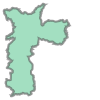

In [9]:
gdf_municipio.iloc[0].geometry

In [10]:
catalog = Catalog()
scenes = []

for y in np.arange(1985, 2021, 5):
    
    begin = datetime(y, 1, 1)
    end = datetime(y+1, 1, 1)
    geom = gdf_municipio.iloc[0].geometry
    maxcloud = 50.

    # Results are returned as a list
    scenes.append(
        pd.DataFrame.from_dict(catalog.search(
            begin=begin,
            end=end,
            geom=geom,
            maxcloud=maxcloud
    )))

In [11]:
df_scenes = pd.concat(scenes).reset_index()

In [12]:
df_scenes

,index,product_id,scene_id,path,row,sensing_time,cloud_cover,geom
0,0,LT05_L1TP_219077_19850531_20170219_01_T1,LT52190771985151CUB01,219,77,1985-05-31 12:34:52,42.00,"POLYGON((-46.131832 -25.368495, -46.13396 -25...."
1,1,LT05_L1TP_219077_19851022_20170218_01_T1,LT52190771985295CUB00,219,77,1985-10-22 12:33:37,15.00,"POLYGON((-46.131832 -25.368495, -46.13396 -25...."
2,2,LT05_L1TP_219076_19851107_20170218_01_T1,LT52190761985311CUB00,219,76,1985-11-07 12:33:00,3.00,"POLYGON((-45.792382 -23.927088, -45.798249 -23..."
3,3,LM05_L1TP_219076_19850515_20180406_01_T2,LM52190761985135FFF03,219,76,1985-05-15 12:34:28,8.00,"POLYGON((-45.792382 -23.927088, -45.798249 -23..."
4,4,LT05_L1TP_219077_19850312_20170219_01_T1,LT52190771985071CUB00,219,77,1985-03-12 12:35:11,14.00,"POLYGON((-46.131832 -25.368495, -46.13396 -25...."
...,...,...,...,...,...,...,...,...
169,25,LC08_L1TP_219077_20200702_20200708_01_T1,LC82190772020184LGN00,219,77,2020-07-02 13:04:32,28.26,"POLYGON((-46.131832 -25.368495, -46.13396 -25...."
170,26,LC08_L1TP_219076_20200803_20200807_01_T1,LC82190762020216LGN00,219,76,2020-08-03 13:04:18,14.95,"POLYGON((-45.792382 -23.927088, -45.798249 -23..."
171,27,LC08_L1TP_219076_20200718_20200722_01_T1,LC82190762020200LGN00,219,76,2020-07-18 13:04:14,18.99,"POLYGON((-45.792382 -23.927088, -45.798249 -23..."
172,28,LC08_L1TP_219077_20201123_20201210_01_T1,LC82190772020328LGN00,219,77,2020-11-23 13:05:05,14.68,"POLYGON((-46.131832 -25.368495, -46.13396 -25...."


In [13]:
df_scenes.to_csv('download/scenes.csv')

In [16]:
# df_scenes.iloc[64]

In [18]:
for i, r in df_scenes.iterrows():
    print(f'Downloading {i+1}/{len(df_scenes)}')
    product = Product(r.product_id)
    try:
        product.download(out_dir=f'download/{r.sensing_time.year}')
    except:
        print(f'Problemas com download da cena {r.scene_id}')
#     print(r.scene_id)

Problemas com download da cena LT52190771995339CUB00
Problemas com download da cena LT52190772000321CUB00
Problemas com download da cena LT52190772005030COA00
Problemas com download da cena LT52190772005094COA00
Problemas com download da cena LT52190772010348COA00
Problemas com download da cena LT52190762010348COA00
Problemas com download da cena LT52190772010364CUB00
Problemas com download da cena LT52190772010252CUB00
